In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
y1 = np.linspace(10 , 100 , 15)
y2 = y1 ** 2
y3 = y1 ** 3

In [ ]:
x = np.linspace(1 , 15. , 15)

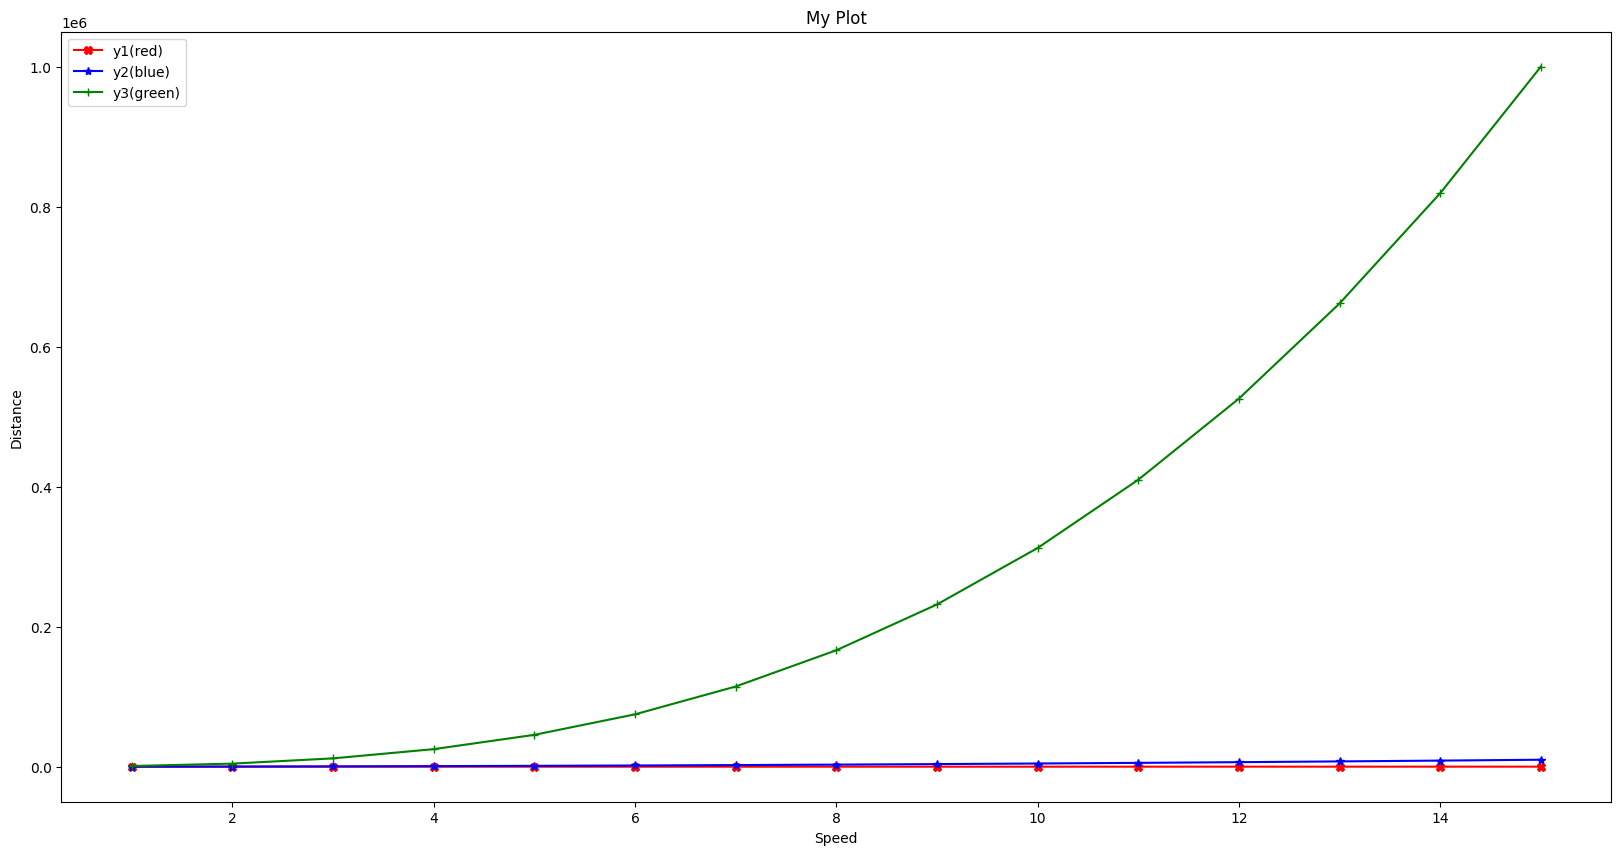

In [ ]:
plt.figure(figsize = ( 20 , 10))
plt.title ('My Plot')
plt.xlabel('Speed')
plt.ylabel('Distance')
plt.plot(x , y1 ,color = 'red' , label = 'y1(red)' , marker = 'X')
plt.plot(x , y2 , color = 'blue' , label = 'y2(blue)' , marker = '*')
plt.plot(x , y3 , color = 'green' , label = 'y3(green)' , marker = '+')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.datasets import make_imbalance

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris_data = load_iris()

In [ ]:
!python --version

Python 3.10.12


In [ ]:
X = iris_data.data
y = iris_data.target

In [ ]:
np.unique(y , return_counts = True)

(array([0, 1, 2]), array([50, 50, 50]))

In [ ]:
from collections import Counter
Counter(y)

Counter({0: 50, 1: 50, 2: 50})

In [ ]:
x_imblanced , y_imblanced = make_imbalance(X , y ,
                                           random_state = 1234,
                                          sampling_strategy = {
                                              0 : 10,
                                              1 : 20 ,
                                              2 : 50
                                          })

In [ ]:
Counter(y_imblanced)

Counter({0: 10, 1: 20, 2: 50})

In [ ]:
smote = SMOTE(n_jobs = -1 , random_state = 1234)

In [ ]:
X_balanced , y_balanced = smote.fit_resample(x_imblanced , y_imblanced)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
bal_dtree = DecisionTreeClassifier()
bal_logistic = LogisticRegression()

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_balanced , y_balanced ,
                                                       test_size = 0.15,
                                                        stratify = y_balanced
                                                       )

In [ ]:
bal_dtree.fit(X_train , y_train)

DecisionTreeClassifier()

In [ ]:
bal_logistic.fit(X_train , y_train)

LogisticRegression()

In [ ]:
y_pred = bal_dtree.predict(X_test)

In [ ]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



In [ ]:
y_pred_log = bal_logistic.predict(X_test)


In [ ]:
print(classification_report(y_pred_log , y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



In [ ]:
X_train_imb , X_test_imb , y_train_imb , y_test_imb = train_test_split(x_imblanced , y_imblanced ,
                                                       test_size = 0.15,
                                                        stratify = y_imblanced
                                                       )

In [ ]:
imbal_dtree = DecisionTreeClassifier()
imbal_logistic = LogisticRegression()

In [ ]:
imbal_dtree.fit(X_train_imb , y_train_imb)


DecisionTreeClassifier()

In [ ]:
imbal_logistic.fit(X_train_imb , y_train_imb)


LogisticRegression()

In [ ]:
y_pred_imb = imbal_dtree.predict(X_test_imb)


In [ ]:
print(classification_report(y_pred_imb , y_test_imb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.67      0.67      0.67         3
           2       0.86      0.86      0.86         7

    accuracy                           0.83        12
   macro avg       0.84      0.84      0.84        12
weighted avg       0.83      0.83      0.83        12



In [ ]:
y_pred_log_imb = imbal_logistic.predict(X_test_imb)


In [ ]:
print(classification_report(y_pred_log_imb , y_test_imb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.67      0.67      0.67         3
           2       0.86      0.86      0.86         7

    accuracy                           0.83        12
   macro avg       0.84      0.84      0.84        12
weighted avg       0.83      0.83      0.83        12

